In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [8]:
tensor_transform = transforms.ToTensor()

dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)

train_loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 100,
                                     shuffle = True)
dataset2 = datasets.MNIST(root = "./data",
                         train = False,
                         download = True,
                         transform = tensor_transform)
test_loader = torch.utils.data.DataLoader(dataset = dataset2,
                                     batch_size = 100,
                                     shuffle = True)

In [9]:
dataiter = iter(train_loader)
images,labels = dataiter.next()
print(torch.min(images),torch.max(images))

tensor(0.) tensor(1.)


In [4]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder= nn.Sequential(
        nn.Conv2d(1,16,3,stride=2,padding=1), #[(inputsize+2*padding-filter_size)/stride] + 1
        nn.ReLU(),
        nn.Conv2d(16,32,3,stride=2,padding=1),
        nn.ReLU(),
        nn.Conv2d(32,64,5),
        nn.ReLU()        
    )
    self.decoder=nn.Sequential(
        nn.ConvTranspose2d(64,32,5),
        nn.ReLU(),
        nn.ConvTranspose2d(32,16,3,stride=2,padding=1,output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(16,1,3,stride=2,padding=1,output_padding=1), #(inputsize-1)*stride + kernal_size + output_padding - 2*padding
        nn.Sigmoid()

    )
  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [5]:
model = Autoencoder()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [6]:
def add_noise(img):
  noise_factor = 0.5
  noise_img = img + torch.randn_like(img)*noise_factor
  noise_img = torch.clip(noise_img,0.,1.)
  return noise_img


Epoch : 1, loss : 0.01069349743425846 
Epoch : 2, loss : 0.010627169554742674 
Epoch : 3, loss : 0.010550773387464385 
Epoch : 4, loss : 0.010502699121522407 
Epoch : 5, loss : 0.010450869576695065 


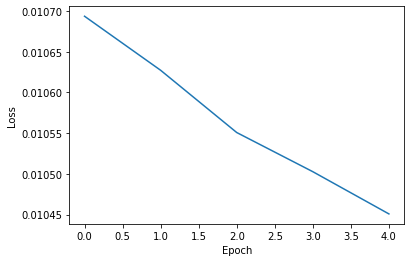

In [11]:
losses = []
l = len(train_loader)
running_loss =0 
for epoch in range(5):
  for (img,_) in train_loader:
    noisy_img = add_noise(img)
    reconstruction = model(noisy_img)
    loss = loss_function(reconstruction,img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  losses.append(running_loss/l)
  print(f"Epoch : {epoch+1}, loss : {losses[epoch]} ")
  running_loss=0
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(losses)


In [12]:
outputs = {}
img, _ = list(test_loader)[-3] 
out = model(img)
outputs["original_img"] = img
outputs['img'] = add_noise(img)
outputs['out'] = out




Original Images


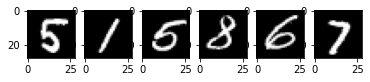

Noisy Images


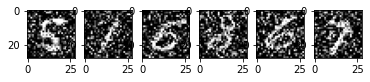

Reconstructed Images


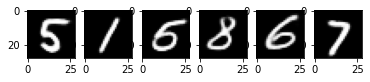

In [13]:
counter = 1
print("Original Images")
for j in range(6):
  val= outputs['original_img']
  plt.subplot(1,6,counter)
  plt.imshow(val[j].reshape(28,28),cmap='gray')
  counter += 1
plt.show()
print("Noisy Images")
for i in range(6):
  val = outputs['img']
  plt.subplot(1, 6, i+1)

  
  plt.imshow(val[i].reshape(28, 28), cmap='gray')
  counter += 1
plt.show()
val = outputs['out'].detach().numpy()
print("Reconstructed Images")
for i in range(6):
  plt.subplot(1, 6, i+1)
  plt.imshow(val[i].reshape(28, 28), cmap='gray')
  counter += 1
plt.show()

	
 